<a href="https://colab.research.google.com/github/ViniSpeck/DS/blob/main/DS_02_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introductory Study

We'll start with an **exploratory analysis** on Airbnb data for Rio de Janeiro.

Data will be obtained from the InsideAirbnb website - http://insideairbnb.com/get-the-data/


In [1]:
#Pandas: Numerical tables and time series analysis and manipulation
import pandas as pd

#Matplotlib: Visualize data through graphics
import matplotlib.pyplot as plt

#Seaborn: Better graphics
import seaborn as sns

#SciPy: NumPy with extra scientific utility
from scipy import stats

#Determines graphics will be shown in the cell after the code
%matplotlib inline

#Load Airbnb's dataset
df=pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2022-06-20/visualisations/listings.csv")



In [2]:
#Show DataFrame
df.head(15)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,272,2022-04-23,1.87,1,311,8,NaN
1,556930647599893392,Venha passar uma pernoite em um veleiro na Urca!,198206849,Andréia,NaN,Urca,-22.94781,-43.16351,Private room,280,1,1,2022-02-19,0.25,1,365,1,NaN
2,1174007,100% Best View In Copa In Suite 2,3962758,Thiago Luiz,NaN,Copacabana,-22.97277,-43.17966,Private room,107,2,177,2022-06-07,1.69,6,357,29,NaN
3,8410797,Ipanema(Arpoador) 100mdo Mar/ Jan & Carnaval +Fev,42038091,Sheila,NaN,Ipanema,-22.98871,-43.19334,Private room,1000,3,1,2017-09-28,0.02,3,362,0,NaN
4,28053241,Navegar a Bordo de um Veleiro Francês no Rio!,193860988,Luciano,NaN,Urca,-22.95056,-43.17175,Private room,1850,2,0,NaN,NaN,1,180,0,NaN
5,249616,Flat at Barra Near by WINDSOR HOTEL,1307761,Malí,NaN,Barra da Tijuca,-23.01097,-43.32266,Entire home/apt,195,3,220,2020-04-20,1.73,2,24,0,NaN
6,249842,"Copacabana, central e perto da praia",1309444,Sonia,NaN,Copacabana,-22.96794,-43.18969,Private room,90,2,140,2022-04-08,1.12,3,6,14,NaN
7,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,671,3,85,2018-02-14,0.59,1,281,0,NaN
8,251701,LEBLON BEACHFRONT VILLA APT.2,1319991,Jake,NaN,Vidigal,-22.99037,-43.23115,Entire home/apt,516,7,27,2019-11-13,0.21,11,365,0,NaN
9,251868,Great & comfy studio Copa!,1321287,Helena,NaN,Copacabana,-22.97920,-43.19010,Entire home/apt,120,4,85,2022-03-01,0.66,2,68,2,NaN


## Getting to know the DataFrame's attributes

Verifying how many rows and columns exist in the DataFrame with ***shape***

In [3]:
print("Inputs (Rows):", df.shape[0])
print("Variables (Columns):", df.shape[1])

Inputs (Rows): 24881
Variables (Columns): 18


Show each column's data type with ***dtypes***

(***display()***=different version of ***print()***)

In [4]:
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

Display all neighborhoods present in the DataFrame

***unique()*** - Keeps one of each value, transforms into array

***drop_duplicates()*** - Keeps one of each value, stays as DataFrame

***sort_values()*** - Order neighborhoods alphabetically

***reset_index(drop=True)*** - Recreates index for the new order and drops former indexes column

In [5]:
df['neighbourhood'].drop_duplicates().sort_values().reset_index(drop=True)

0               Abolição
1                  Acari
2      Alto da Boa Vista
3               Anchieta
4                Andaraí
             ...        
148         Vila Militar
149       Vila Valqueire
150        Vila da Penha
151                Zumbi
152           Água Santa
Name: neighbourhood, Length: 153, dtype: object

Aggregating values

In [6]:
print("Number of rows (total including NaNs):",df['id'].count())
print("Price sum:",df['price'].sum())
print("Price average:",df['price'].mean())
print("Lowest price:",df['price'].min())
print("Highest price:",df['price'].max())
print("Qty of null names:", df['name'].isnull().sum())

Number of rows (total including NaNs): 24881
Price sum: 18546195
Price average: 745.3958844097906
Lowest price: 0
Highest price: 591723
Qty of null names: 21


Calculating the % of null(NaN) rows in DataFrame

*(sum of null values/number of rows)* * *100* 

***sort_values(ascending=False)*** - Sort values descending

In [7]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  30.818697
last_review                        30.818697
host_name                           0.470238
name                                0.084402
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
id                                  0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

**Trim Mean** - Average which eliminates outliers (upper and lower percentile)

In [8]:
stats.trim_mean(df['price'], 0.1)

389.5202210499874

Creating Histograms (no criteria yet)

In [ ]:
df.hist(bins=2,figsize=(20,30))

**Descriptive Statistics**

In [15]:
df[  ['price','minimum_nights','availability_365']  ].describe()

,price,minimum_nights,availability_365
count,24881.000000,24881.000000,24881.000000
mean,745.395884,5.358426,214.774165
std,4983.640074,26.044111,131.693681
min,0.000000,1.000000,0.000000
25%,180.000000,1.000000,89.000000
50%,300.000000,2.000000,212.000000
75%,600.000000,4.000000,356.000000
max,591723.000000,1125.000000,365.000000


Prices' BoxPlot

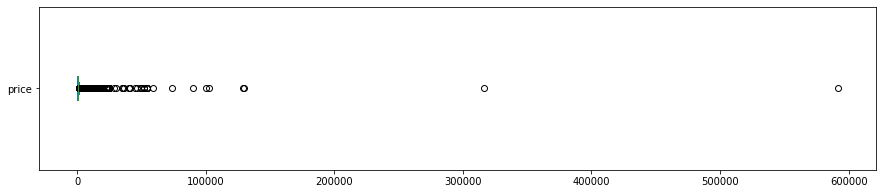

Number of prices above R$ 1.000,00: 1830
% in total:  7.3550098468711065


In [41]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()
amount = (df.price>1500).sum()
print("Number of prices above R$ 1.000,00:", amount)
print("% in total: ", (amount/df.price.count() * 100))

**Correlation Analysis**



In [45]:
correlation = df[['price','minimum_nights','availability_365', 'number_of_reviews', 'reviews_per_month']].corr()
print(correlation)

                      price  minimum_nights  availability_365  \
price              1.000000        0.013890          0.042520   
minimum_nights     0.013890        1.000000          0.024790   
availability_365   0.042520        0.024790          1.000000   
number_of_reviews -0.037626       -0.035262         -0.141667   
reviews_per_month -0.061091       -0.040899         -0.103398   

                   number_of_reviews  reviews_per_month  
price                      -0.037626          -0.061091  
minimum_nights             -0.035262          -0.040899  
availability_365           -0.141667          -0.103398  
number_of_reviews           1.000000           0.511114  
reviews_per_month           0.511114           1.000000  
